# 8.1 Mathematical tools for image formation

Image formation is the process of projecting the elements appearing in a **3D scene** (objects, surfaces, landscapes, etc.) on the **2D image plane**. Such 3D scene could be:

- the real world captured by a camera, 
- a videogame engine transforming the 3D virtual enviroment to images simulating the player point of view,
- and so on.$\\[5pt]$

<img src="./images/intro.jpg" width="500"/>$\\[5pt]$

From the topic *image formation* two main questions arise:

- **The geometric problem:** Where does each 3D point project on the image? 
- **The radiometric problem:** What will be the color on the image of each 3D point? *(not addressed here)*

In this notebook we will see some basic mathematical tools that are required for studying image formation models (e.g. pinhole model).  These tools are:

- Euclidean transformations in 3D (section 8.1.1).
  - Products of 3D vectors (8.1.1.1).
  - Linear transformation of vectors (8.1.1.2).
  - Rotation matrix (8.1.1.3).
- Homogeneous transformations (8.1.2).

## Problem context - Camera in first-person videogames 

In video games, it is called *first person* to any graphical perspective rendered from the viewpoint of the player's character, or a viewpoint from the cockpit or front seat of a vehicle driven by the character. Many genres incorporate first-person perspectives, including adventure games, driving, sailing, and flight simulators. Perhaps the more extended are first-person shooters, in which the graphical perspective is an integral component of the gameplay.

Usually, when someones plays a first-person computer game, the `WASD` keys of our keyboard are used to move the camera position in the $x$ and $z$ axes and `SPACE` is used for jumping (this moves the camera in the $y$ axis). The mouse is used for changing the camera direction (this applies *pitch* and/or *yaw* rotations to the camera coordinate system). 

<img src="./images/first_person.jpg" width="500"/>$\\[3pt]$

Our task in this notebook is **to program these camera displacements and rotations so they can be integrated into a graphic engine!** Obviously, this implies learning all the maths needed, so let's start the fun!

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from math import sin, cos, radians
%matplotlib notebook

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
images_path = './images/'

## 8.1.1 3D Euclidean transformations
### 8.1.1.1 Product of 3D vectors

First of all, we need to know how vectors are defined and how to multiply them.

A **free vector** is defined from a pair of points: $(p,q)$

$\hspace{2cm} X_p = \begin{bmatrix} X_1 \\ Y_1 \\ Z_1\end{bmatrix} \in \mathbb{R}^3, \ X_q = \begin{bmatrix} X_2 \\ Y_2 \\ Z_2 \end{bmatrix} \in \mathbb{R}^3 \\[5pt]$

In this way, we can retrieve the coordinates of a vector $v$ as:

$\hspace{2cm} v = \begin{bmatrix} v_1 \\ v_2 \\ v_3\end{bmatrix} = \begin{bmatrix} X_2 - X_1 \\ Y_2 - Y_1  \\ Z_2 - Z_1 \end{bmatrix} \in \mathbb{R}^3$

We can plot a set of 3D vector using matplotlib's method [`quiver()`](https://matplotlib.org/3.1.1/gallery/mplot3d/quiver3d.html), which takes 6 main arguments:

- *X*,*Y*,*Z*: tuples containing the X, Y and Z coordinates of the origin point in the set of vectors.
- *U*,*V*,*W*: tuples containing the X, Y and Z coordinates of all vectors w.r.t. such origin point.

The next code illustrates how to plot two free vectors $v_1 = (2,1,1)$, and $  v_2 = (0,1,2)$, with origin point $p=(1,1,1)$

In [ ]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

# Vector coordinates
v = np.array([[2,0],[1,1],[1,2]])

# Vector labels
labels = ["v1","v2"]

# Origin coordinates
origin = np.array([[1,1],[1,1],[1,1]])

# Prepare vector for plotting input
X,Y,Z = origin[0,:], origin[1,:], origin[2,:]
U,V,W = v[0,:], v[1,:], v[2,:]

# Create figure
fig = plt.figure()

# Prepare figure for 3D data
ax = fig.gca(projection='3d')

# Set axes limits
ax.set_xlim3d(-1, 4)
ax.set_ylim3d(-1, 4)
ax.set_zlim3d(-1, 4)

# Add axis labels and aspect ratio
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.set_aspect('equal')

# Plot vectors
ax.quiver(X, Y, Z, U, V, W,color="black")

# Add labels
for i in range(len(labels)):
    ax.text(U[i]+X[i], V[i]+Y[i], W[i]+Z[i] ,labels[i], fontsize=12)

# And show the figure!
plt.show()

### <span style="color:green"><b><i>ASSIGNMENT 1: We want to see how things work</i></b></span>

**Our first task is to** define the method called `plot_vectors()`, which returns a figure plotting a number of input free vectors as defined in `v` with a given `origin` and axes `labels`. 

*Note that:*

- *The function also expects as inputs a figure and some axes. This permits us to call the method multiple times reusing the same figure.*

- *The first time that the method is called, the axes must be previously initialized outside of the method using [ax = fig.gca(projection='3d')](https://kite.com/python/docs/matplotlib.figure.Figure.gca).*

In [ ]:
# Assignment 1
def plot_vectors(fig, ax, v, origin, labels, color, axes_lim):
    """ Plot 3D vectors using matplotlib
        
        Args:
            fig, ax: Figure and axes (must be 3D)
            v: Array containing vector coordinates, each column contains a 3D vector
            origin: Array containing vector origin points for 'v' array
            labels: Array of strings containing labels for the vectors, it should have same length than columns in 'v'
            color: String containing the color of the vectors
            axes_lim: 6-size vector containing the minimum and maximum limits for each axis [X_min,X_max,X_min,X_max,Z_min,Z_max]
        
        Returns: 
            fig, ax: Figure and axis of a 3D plot with the vectors plotted
    """   

    # Prepare vector for plotting input
    

    # Set axes limits
    
    
    # Add axis labels and aspect ratio
    
    
    # Plot vectors
    
    
    # Add labels
    

To **try your function**, the next code should show a orthonormal basis (unit vectors) centered at $(0,0,0)$.

In [ ]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

# Create figure
fig = plt.figure()

# Prepare figure for 3D data
ax = fig.gca(projection='3d')
   
# Vector coordinates
v = np.array([[1,0,0],[0,1,0],[0,0,1]])

# Origin coordinates
origin = np.array([[0,0,0],[0,0,0],[0,0,0]])

# Vector labels
labels = ["x","y","z"]

# Call plot_vectors
fig, ax = plot_vectors(fig, ax, v, origin, labels, "red",[-1,2,-1,2,-1,2])

fig.show()

Now that you know how to define and plot a set of vectors, you are ready to learn two basic operations with them: the *dot* and *cross products*.

#### Dot product of two vectors

The dot product (also called scalar product or inner product) of two vectors is the sum of the element-wise product between them, which results in a **scalar**.

***Algebraic definition:***

$$ \mathbf{a} = \begin{bmatrix} a_1 \\ a_2 \\ a_3\end{bmatrix} \;\;\;\;\;\;  \mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix}$$

$$\langle\mathbf{a},\mathbf{b}\rangle = \mathbf{a} \cdot \mathbf{b} = \mathbf{a}^T\mathbf{b} = \texttt{trace}(\mathbf{a} \, \mathbf{b}^T) = a_1b_1 + a_2b_2 + a_3b_3 \in \mathbb{R}$$

The dot product induces a norm for a vector (a distance between 2 points), hence defining the Euclidean norm:

$$\|\mathbf{a}\| = \sqrt{\mathbf{a}^T\mathbf{a}} = \sqrt{a_1^2 + a_2^2 + a_3^2}$$

***Geometric definition:*** the dot product of two Euclidean vectors $\mathbf{a}$ and $\mathbf{b}$ is defined by:

$$ \mathbf{a}\cdot \mathbf{b} = \| a\| \, \|b\| \cos \theta$$

where $\theta$ is the angle between both vectors. That is, the dot product represents the product of their Euclidean magnitudes and the cosine of the angle between them. Such a definition can be rearranged to calculate the projection of one vector onto the other: $\\[5pt]$

<img src="./images/dot.png" width="300" align="center"/>

### **<span style="color:green"><b><i>ASSIGNMENT 2: Playing with the dot product</i></b></span>**

Compute the **dot product** of two vectors: $(0,2,4)$ and $(2,3,2)$ using the described method and check that you get the same result than using `np.dot()` and `np.linalg.norm()`. Then compute the projection of the first vector onto the second one.

In [ ]:
# Assignment 2

# Matrix of vectors


# Dot product


# Norm of second vector


# Projection of first vector onto the second one


<font color='blue'>**Expected output:**  </font>

3.3955

**Cross product of two vectors**

The cross product (also called vector product) of two linearly independent vectors $\mathbf{a}$ and $\mathbf{b}$ is a linear transformation which results in **another vector** $\mathbf{c}$ perpendicular to both, and thus to the plane containing them. It's defined as:$\\[5pt]$

$$ \mathbf{a} = \begin{bmatrix} a_1 \\ a_2 \\ a_3\end{bmatrix} \hspace{1cm} \mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix} \\[5pt]$$

$$ \mathbf{c} = \mathbf{a} \times \mathbf{b} = \begin{vmatrix}
i & j & k \\
a_1 & a_2 & a_3 \\
b_1 & b_2 & b_3
\end{vmatrix}
= 
(a_2 b_3 \mathbf{i} + a_3 b_1 \mathbf{j} + a_1 b_2 \mathbf{k}) - (a_3 b_2 \mathbf{i} + a_1 b_3 \mathbf{j} + a_2 b_1 \mathbf{k})
$$

$$ = 
(a_2 b_3 - a_3 b_2)\mathbf{i} + (a_3 b_1 - a_1 b_3)\mathbf{j} + (a_1 b_2 - a_2 b_1)\mathbf{k}
$$

Although it is more convenient to express it as a linear (matrix) transformation:

$$ \mathbf{c} = \mathbf{a} \times \mathbf{b} 
= [\mathbf{a}]_\times\mathbf{b} \hspace{1.5cm} [\mathbf{a}]_\times = \begin{bmatrix} 0 & -a_3 & a_2 \\ a_3 & 0 & -a_1 \\ -a_2 & a_1 & 0\end{bmatrix}  \in \mathbb{R}^3$$

where $[\mathbf{a}]_\times$ is called a *skew-symmetric* matrix of $\mathbf{a}$. Thus, the magnitude of the resultant vector:

$$ \|\mathbf{c}\| = \|\mathbf{a}\| \times \|\mathbf{b}\| \sin \theta$$

This has an interesting **geometric meaning**: the magnitude of the cross product can be interpreted as the area of the parallelogram that has $\mathbf{a}$ and $\mathbf{b}$ as sides. Also, as mentioned, the resulting vector is orthogonal to both $\mathbf{a}$ and $\mathbf{b}$ vectors.

<img src="./images/cross.png" width="200" align="center"/>

### **<span style="color:green"><b><i>ASSIGNMENT 3: It's cross product time</i></b></span>**

Compute the cross product of any 2 vectors $\mathbf{a}$ and $\mathbf{b}$. Check that you get the same result as using `np.cross()`. Then plot $\mathbf{a}$ and $\mathbf{b}$ as black vectors and their cross product in red using the previous defined method `plot_vectors()`.

*Tip: Matrix multiplication is defined in numPy as `A @ B`. To transform an array (row) to a vertical vector (column) you can use [np.vstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html).*

In [ ]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

# Assignment 3

# Vector coordinates


# Vector origin points


# Isolate vectors


# Compute â


# Compute cross product


# Transform to vertical vector


# Create figure


# Prepare figure for 3D data


# Call plot_vectors


#### Extra: product of three vectors

The product of three vectors (or scalar triple product) is a combination of the two previous ones: it is defined as the dot product of a vector $\mathbf{c}$ with the cross product of the other two, namely $\mathbf{a}$ and $\mathbf{b}$, that is:

$$(a \times b) \cdot c$$

This product also has a **geometric meaning**: it is the (signed) volume of the parallelepiped defined by those vectors:$\\[10pt]$

<img src="./images/triple.png" width="250"/>$\\[3pt]$

### **<span style="color:green"><b><i>ASSIGNMENT 4: concluding with the triple product</i></b></span>**

Compute the triple product of $a=(1,2,3)$, $b=(3,1,2)$ and $c=(2,2,1)$:

*Notice that $c \cdot (a \times b) = a \cdot (b \times c)$*

In [ ]:
# Assignment 4

# Vector coordinates


#Isolate vectors


# Compute â


# Compute cross product


# Compute triple product



<font color='blue'>**Expected output:**  </font>

   Triple product: 11

### 8.1.1.2 Linear transformation of vectors

As we saw before, the cross product of two vectors is a linear transformation, i.e., a linear function that transforms vectors. But cross product is just one particular case of linear transformation in where the matrix that defines the linear function is created from the elements of a vector. A more general definition for linear transformations in the 3D-space would be:

$$A\vec{v} = \begin{bmatrix} a_1 & a_2 & a_3 \\ a_4 & a_5 & a_6 \\ a_7 & a_8 & a_9 \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \\ v_3\end{bmatrix} =  \begin{bmatrix} a_1v_1 + a_2v_2 + a_3v_3 \\ a_4v_1 + a_5v_2 + a_6v_3 \\ a_7v_1 + a_8v_2 + a_9v_3\end{bmatrix}$$

*Note that $\vec{v}$ can be a matrix containing one vector per column, so the linear transformation is applied to every vector.*

But, what means that a operation (in this case a matrix multiplication) is linear?

It means that the following two properties hold:

- **Aditivity:** $f(\mathbf{x}_1 + \mathbf{x}_2) = f(\mathbf{x}_1) + f(\mathbf{x}_2)$$\\[5pt]$

- **Scaling:** $f(\alpha \mathbf{x}_1) = \alpha f(\mathbf{x}_1)$

Equivalently, the superposition principle also holds:

- **Superposition:** $f(\alpha \mathbf{x}_1 + \beta \mathbf{x}_2) = \alpha f(\mathbf{x}_1) + \beta f(\mathbf{x}_2)$ 

And luckily, matrix multiplication satisfies this property!

$$A(\alpha \mathbf{x}_1 + \beta \mathbf{x}_2) = \alpha A \mathbf{x}_1 + \beta A \mathbf{x}_2 = \alpha \mathbf{y}_1 + \beta \mathbf{y}_2$$

that is: the transformation of linear combinations of vectors $(\alpha \mathbf{x}_1 + \beta \mathbf{x}_2)$ is the linear combination of the transformed vectors $(\alpha \mathbf{y}_1 + \beta \mathbf{y}_2)$. The following figure shows an example of this property in action.

<img src="./images/linear.png" width="600" align="center"/>

### **<span style="color:green"><b><i>ASSIGNMENT 5: Playing with linear transformations</i></b></span>**

Implement a complete method `apply_transformation()`, which applies a `transformation` to a set of vectors `v` and then shows the original vectors in black and the transformed ones in red. **Reuse the method `plot_vectors`** for this exercise.

*NOTE: The labels for the transformed vectors are the same that for the originals (but showed in red).*

In [ ]:
# Assigment 5
def apply_transformation(transformation, v, origin, labels, axes_lim):
    """ Apply a linear transformation to a set of 3D-vectors and plot them
        
        Args:
            transformation: 3x3 matrix that defines the linear transformation
            v: Array containing vector coordinates, each column contains a 3D vector
            origin: Array containing vector origin points for 'v' array
            labels: Array of strings containing labels for the vectors, it should have same length than columns in 'v'
            axes_lim: 6-size vector containing the minimum and maximum limits for each axis [X_min,X_max,X_min,X_max,Z_min,Z_max]
    """   
    
    # Apply transformation
    
    
    # Create figure
    

    # Prepare figure for 3D data
    

    # Call plot_vectors
    

You can use next code **to test if your results are correct**:

In [ ]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

# Transformation
transformation = [[2,2,2],[0,2,0],[0,0,2]]

# Vector coordinates
v = np.array([[1,0,0],[0,1,0],[0,0,1]])

# Origin coordinates
origin = np.array([[0,0,0],[0,0,0],[0,0,0]])

apply_transformation(transformation,v,origin,["x","y","z"],[-3,3,-3,3,-3,3])

<font color='blue'>**Expected output:**  </font>

<img src="./images/example_transformation.png" width="500" align="left"/>
<img src="./images/blank.png" width="100" align="rigth"/>

### 8.1.1.3 Rotation matrix

A rotation matrix represents a special linear transformation that rotates vectors preserving their length.

$$
\mathbf{R} = 
\begin{bmatrix} 
r_{11} & r_{12} & r_{13} \\ 
r_{21} & r_{22} & r_{23} \\ 
r_{32} & r_{32} & r_{33} \end{bmatrix} 
= \underbrace{[r_x \ r_y \ r_z]}_{\text{coordinates of the original}\\ \text{basis in the new one}} \in \mathbb{R}^{3x3}
$$

In this way, if we have a point $p$ with coordinates $p=[x,y,z]^T$ in the `WORLD` reference system, we can rotate it around the origin of coordinates and obtain its new coordinates by:

$$
p' = \mathbf{R}p 
\ \ \rightarrow \ \ 
\begin{bmatrix} 
x' \\ y' \\ z' 
\end{bmatrix} 
= 
\mathbf{R} 
\begin{bmatrix} 
x \\ y \\ z 
\end{bmatrix}
$$

In our graphical engine, this could correspond to the case of a point orbiting around the camera and is called **active rotation**. 

On the other hand, we can use the inverse of $\mathbf{R}$ to compute the coordinates $p$ of a point $q$ within a rotated reference system. In this case, we can understand this as if the point is fixed in the `WORLD` reference system and it is the camera (or the player point-of-view, if you want) which is rotating within it. This, in turn, is called **passive rotation**.

<img src="./images/rotation.png" width="300" align="center"/>


In this case, we have that:
$$
p = \mathbf{R}^{-1}q = \mathbf{R}^Tq \rightarrow 
\begin{bmatrix} 
p_x \\ p_y \\ p_z 
\end{bmatrix} = 
\mathbf{R}^T
\begin{bmatrix} 
q_x \\ q_y \\ q_z 
\end{bmatrix}
$$
A rotation matrix $\mathbf{R}$ is an **orthogonal** matrix, so:

- Its inverse equals its transpose (great property!): $\mathbf{R}^T\mathbf{R} = \mathbf{R}\mathbf{R}^T = I \rightarrow \mathbf{R}^T = \mathbf{R}^{-1}$

- $\mathbf{R}$ also verifies that $\ \texttt{det}(\mathbf{R}) = +1$

In 3D-space, we have three elemental rotations, one in each axis, namely *yaw*, *pitch* and *roll*:

<img src="./images/rotation_plane.png" width="500" align="center"/>

These elemental rotations are defined as three different matrices:

$\hspace{2cm}\mathbf{R}_z(\theta) = \begin{bmatrix} cos\theta & -sin\theta & 0 \\ sin\theta & cos\theta & 0 \\ 0 & 0 & 1 \end{bmatrix} \hspace{1cm} \mathbf{R}_y(\theta) = \begin{bmatrix} cos\theta & 0 & -sin\theta \\ 0 & 1 & 0 \\ -sin\theta & 0 & cos\theta \end{bmatrix} \hspace{1cm} \mathbf{R}_x(\theta) = \begin{bmatrix} 1 & 0 & 0 \\ 0 & cos\theta & -sin\theta \\ 0 & sin\theta & cos\theta \end{bmatrix}\\[5pt]$

but by multiplying them we can perform a multiple-axes rotation!

$$
\mathbf{R}_W^C 
= 
\begin{bmatrix} 
r_{11} & r_{12} & r_{13} \\ 
r_{21} & r_{22} & r_{23} \\ 
r_{31} & r_{32} & r_{33} 
\end{bmatrix} 
= 
\mathbf{R}_z(yaw)\mathbf{R}_y(pitch)\mathbf{R}_x(roll) 
$$

*Note that elemental rotation matrices keep static the transformation in an axis, (e.g. pitch rotation doesn't modify $y$ values)*

The are several different orders in where these matrixes can be multiplied but the one presented here (i.e. Z-Y-X) is one of the most used (e.g. robotics, airbone navigation, etc.). Be careful! Order matters here as matrix multiplication is not commutative!

The notation in the $\mathbf{R}^C_W$ matrix means that such a rotation transforms points from the `WORLD` reference frame to the `CAMERA` one, and it must be understood as **the rotation of the `WORLD` reference frame as seen from the `CAMERA` one**. Thereby, we could transform any point (or vector) from the world coordinate system (e.g. a corner in a room) to the camera coordinate system (e.g. a security camera in the ceiling of the room).

However, usually cameras are not placed at the center of the `WORLD` coordinate system, that is, they don't share their origin of coordinates. That means that the camera is also translated w.r.t. the `WORLD` reference system, so we have to include a translation vector $\mathbf{t}_W^C$ in order to be able to convert points between the two reference frames. Again, this translation vector must be understood as **the position of the origin of the `WORLD` reference frame as seen from the `CAMERA` coordinate system**: 

$$p^C = \mathbf{R}^C_W p^W + \mathbf{t}_W^C$$

$$ \begin{bmatrix} x' \\ y' \\ z' \end{bmatrix} 
= 
\begin{bmatrix} 
r_{11} & r_{12} & r_{13} \\ 
r_{21} & r_{22} & r_{23} \\ 
r_{31} & r_{32} & r_{33} 
\end{bmatrix} 
\begin{bmatrix} x \\ y \\ z 
\end{bmatrix} 
+ 
\begin{bmatrix} t_x \\ t_y \\ t_z \end{bmatrix}
$$

In this expression, the superindex indicates the reference system in where the element is expressed. Thus, for instance, $p^C$ indicates that the position of the point $p$ is expressed in the `CAMERA` reference system.

### **<span style="color:green"><b><i>ASSIGNMENT 6: Rotating and translating things</i></b></span>**
 
 Now, we are going to implement the `apply_rotation_translation()` method, which accepts *pitch*, *yaw* and *roll* rotation angles (in degrees) and a translation vector and applies such transformations to an input vector.

*Tip: you can transform degrees to radians using [`radians()`](https://www.geeksforgeeks.org/degrees-and-radians-in-python/).*

In [ ]:
# Assignment 6
def apply_rotation_translation(v, origin, yaw, pitch, roll, translation, labels, axes_lim):
    """ Apply a linear transformation to a set of 3D-vectors and plot them
        
        Args:
            v: Array containing vector coordinates, each column contains a 3D vector
            origin: Array containing vector origin points for 'v' array.
            yaw: Degrees to rotate the coordinate system around the 'Z' axis 
            pitch: Degrees to rotate the coordinate system around the 'Y' axis 
            roll: Degrees to rotate the coordinate system around the 'X' axis 
            translation: Column vector containing the translation for each axis
            labels: Array of strings containing labels for the vectors, it should have same length than columns in 'v'
            axes_lim: 6-size vector containing the minimum and maximum limits for each axis [X_min,X_max,X_min,X_max,Z_min,Z_max]
    """   
    
    # Transform to radians
    
    
    # Construct rotation matrices
    
    
    # Combine rotation matrices
    
    
    # Apply transformation
    
    
    # Create figure
    

    # Prepare figure for 3D data
    

    # Call plot_vectors
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, radians
from mpl_toolkits.mplot3d import Axes3D

def apply_rotation_translation(v, origin, yaw, pitch, roll, translation, labels, axes_lim):
    """ Apply a linear transformation to a set of 3D-vectors and plot them """
    
    # Transform to radians
    yaw = radians(yaw)
    pitch = radians(pitch)
    roll = radians(roll)

    # Construct rotation matrices
    R_yaw = np.array([[cos(yaw), -sin(yaw), 0],
                      [sin(yaw),  cos(yaw), 0],
                      [0,         0,        1]])
    
    R_pitch = np.array([[ cos(pitch), 0, sin(pitch)],
                        [ 0,          1, 0        ],
                        [-sin(pitch), 0, cos(pitch)]])
    
    R_roll = np.array([[1, 0,          0        ],
                       [0, cos(roll), -sin(roll)],
                       [0, sin(roll),  cos(roll)]])
    
    # Combined rotation
    R = R_yaw @ R_pitch @ R_roll
    
    # Apply transformation
    v_transformed = R @ v + translation   # apply to each column

    # Create figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Axis labels and limits
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Frame Transformation')
    ax.set_xlim(axes_lim[0], axes_lim[1])
    ax.set_ylim(axes_lim[2], axes_lim[3])
    ax.set_zlim(axes_lim[4], axes_lim[5])

    # Plot original frame
    for i in range(v.shape[1]):
        ax.quiver(origin[0, i], origin[1, i], origin[2, i],
                  v[0, i], v[1, i], v[2, i],
                  color='b', arrow_length_ratio=0.1, alpha=0.6)
        ax.text(v[0, i], v[1, i], v[2, i], f"{labels[i]}₀", color='b')

    # Plot transformed frame
    for i in range(v.shape[1]):
        ax.quiver(translation[0, 0], translation[1, 0], translation[2, 0],
                  v_transformed[0, i]-translation[0, 0],
                  v_transformed[1, i]-translation[1, 0],
                  v_transformed[2, i]-translation[2, 0],
                  color='r', arrow_length_ratio=0.1)
        ax.text(v_transformed[0, i], v_transformed[1, i], v_transformed[2, i],
                f"{labels[i]}₁", color='r')

    plt.show()



You can use next code **to test if your results are correct**:

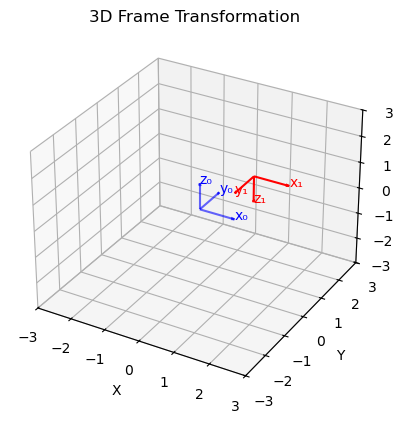

In [2]:
# Vector coordinates (3×3: each column is a basis vector)
v = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])

# Origins (all at (0,0,0) for the initial frame)
origin = np.zeros((3,3))

# Translation vector (as column)
translation = np.array([[1],[1],[1]])

# Apply transformation
apply_rotation_translation(v, origin, yaw=0, pitch=0, roll=180,
                           translation=translation,
                           labels=["x","y","z"],
                           axes_lim=[-3,3,-3,3,-3,3])

<font color='blue'>**Expected output:**  </font>

<img src="./images/example_transformation_2.png" width="500" align="left"/>
<img src="./images/blank.png" width="100" align="rigth"/>

This is strongly related to a camera system in a videogame. For example, it could represent a movement of the player where they jump and rotate. That is, we are moving the `CAMERA` reference system within the `WORLD` one. Next, **you are asked to** simulate the following camera movements in such a context, using the previously defined method.

- Look to the **right 90 degrees** and walk **forward 2 units**


In [ ]:
# Vector coordinates

# Origin coordinates

# Traslation vector

# Apply transformation


- While you are walking (**two units forward**), jump (our character can **jump one unit of height**), and look **45 degrees to the floor** (e.g. jumping an obstacle).

In [ ]:
# Write your code here!

# Vector coordinates

# Origin coordinates

# Traslation vector

# Apply transformation

## 8.1.2 One step further: Homogenous transformations

Homogenous (also called projective) transformations are linear transformations (i.e. matrix multiplications) **between homogenous coordinates** (vectors). Such coordinates are obtained from Cartesian (inhomogenous) vectors by **extenging them with a non-negative number** (for convenience 1).

We are going to explain homogenous transformations using a 3D space, **this is generalizable to any other dimension**.

A 3D vector in **inhomogenous coordinates** looks like:

$$X = \begin{bmatrix} X \\ Y \\ Z \end{bmatrix} \in \mathbb{R}^3$$

while the same vector in **homogenous coordinates** has the form:

$$\tilde{X} = \begin{bmatrix} X \\ Y \\ Z \\ 1 \end{bmatrix} \equiv \begin{bmatrix} \lambda X \\ \lambda Y \\ \lambda Z \\ \lambda \end{bmatrix} \in \mathbb{R}^4$$

We can go back by dividing the three first coordinates by the fourth:$\\[5pt]$

$$\tilde{X} = \begin{bmatrix} \lambda X \\ \lambda Y \\ \lambda Z \\ \lambda \end{bmatrix} \Rightarrow X = \begin{bmatrix} X/\lambda \\ Y/\lambda \\ Z/\lambda \end{bmatrix}$$

As a consecuence of $\lambda$, **any transformation in homogenous coordinates holds for any scaled matrix**:
  
$$
\begin{bmatrix} x_1' \\ x_2' \\ x_3' \\ x_4' \end{bmatrix} 
= 
\begin{bmatrix} p_{11} & p_{12} & p_{13} & p_{14} \\ p_{21} & p_{22} & p_{23} & p_{24} \\ p_{31} & p_{32} & p_{33} & p_{34} \\ p_{41} & p_{42} & p_{43} & p_{44} \end{bmatrix} 
\begin{bmatrix} \lambda x_1 \\ \lambda x_2 \\ \lambda x_3 \\ \lambda \end{bmatrix} 
= 
\lambda 
\begin{bmatrix} p_{11} & p_{12} & p_{13} & p_{14} \\ p_{21} & p_{22} & p_{23} & p_{24} \\ p_{31} & p_{32} & p_{33} & p_{34} \\ p_{41} & p_{42} & p_{43} & p_{44} \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ 1 
\end{bmatrix} 
$$

Then, the following transfomations are equivalent:

$$
\begin{bmatrix} 1 & -3 & 2 & 5 \\ 4 & 2 & 1 & 2 \\ 4 & -1 & 0 & 2 \\ -6 & 2 & 1 & 2 
\end{bmatrix} 
\equiv 
\lambda 
\begin{bmatrix} 1 & -3 & 2 & 5 \\ 4 & 2 & 1 & 2 \\ 4 & -1 & 0 & 2 \\ -6 & 2 & 1 & 2 
\end{bmatrix}
$$

**This indetermination is typically handled by fixing one entry of the matrix**, (e.g. $p_{44} = 1$). Also, these matrices must be non-singular (Rank = 4).

### Why do we want this?

Now that we know how homogenous coordinates and homogenous transformations works, it's time for understanding **why this is interesting**.

For now, we were performing complete transformations (rotations and translations) by using a rotation matrix and adding a translation vector to the rotated points ($p' = \mathbf{R}p + \mathbf{t}$).

The problem of this transformation is that the **concatenation of transformations** when a sequence of transformations has to be done becomes a mess:

$\hspace{2cm} p' = \mathbf{R}_1p+\mathbf{t}_1 \\ \hspace{2cm} p'' = \mathbf{R}_2p' + \mathbf{t}_2 = \mathbf{R}_2(\mathbf{R}_1p+\mathbf{t}_1) + \mathbf{t}_2 = \mathbf{R}_2\mathbf{R}_1p + \mathbf{R}_2\mathbf{t}_1 + \mathbf{t}_2$

In the context of our problem, every time we move the camera we have to concatenate a new transformation. Imagine this in a first-person videogame, where a transformation of the coordinate system is needed in every frame. In just a second more than 60 concatenations should be computed.

**What happens if we use homogenous coordinates?**

We can express a transformation consisting of a rotation + translation using only a matrix multiplication:

$$ \tilde{p}' = \mathbf{T}_1\tilde{p} \Rightarrow \begin{bmatrix} X' \\ Y' \\ Z' \\ 1 \end{bmatrix} = \begin{bmatrix} r_{11} & r_{12} & r_{13} & t_x\\ r_{21} & r_{22} & r_{23} & t_y \\ r_{31} & r_{32} & r_{33} & t_z \\ 0 & 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} X \\ Y \\ Z \\ 1 \end{bmatrix} = \begin{bmatrix} r_{11}X + r_{12}Y + r_{13}Z + t_x \\ r_{21}X + r_{22}Y + r_{23}Z + t_y \\ r_{31}X + r_{32}Y + r_{33}Z + t_z \\ 0X + 0Y + 0Z + 1 \end{bmatrix} = \begin{bmatrix} r_{11}X + r_{12}Y + r_{13}Z \\ r_{21}X + r_{22}Y + r_{23}Z \\ r_{31}X + r_{32}Y + r_{33}Z \\ 1 \end{bmatrix} +  \begin{bmatrix} t_x \\ t_y \\ t_z \\ 0 \end{bmatrix}$$

Note that the 3$\times$3 left-top submatrix of the $\mathbf{T}_1$ matrix is a rotation matrix while the last column contains the desired translation. 
This is the main reason for using homogeneous coordinates, look **how concatenation is applied now!**

$\hspace{02cm}  \tilde{p}' = \mathbf{T}_1\tilde{p} \\
 \hspace{2cm}  \tilde{p}'' = \mathbf{T}_2\tilde{p}' = \mathbf{T}_2\mathbf{T}_1\tilde{p}$
 
**Concatenation becomes much easier**, being only consecutive matrix multiplications (remember that, nowadays, matrix multiplications are very fast using GPUs).

**Let's play a bit with homogeneous coordinates**. We are going to apply a homogenous transformation to a 3D object (set of 3D-points). For this, we have defined `data`$\in \mathbb{R}^4$, a **matrix containing more than 3k points in homogenous coordinates**:

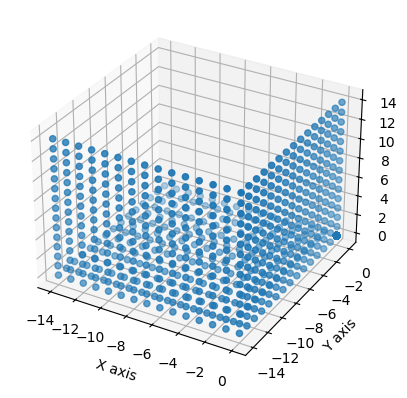

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.load("./data/data.npy")

# Create figure
fig = plt.figure()

# Prepare figure for 3D data
ax = fig.add_subplot(111, projection='3d')

# Name axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Plot points
ax.scatter(data[0, :], data[1, :], data[2, :])

plt.show()


You can adjust elevation and azimuth settings of the 3D scatter plot. 

Understanding the Parameters:
Elevation (elev)
- 0°: View from the XY plane level (side view)
- 90°: View from directly above (top-down view)

Azimuth (azim)
- 0°: View along the negative Y-axis toward positive Y
- 90°: View along the positive X-axis toward negative X


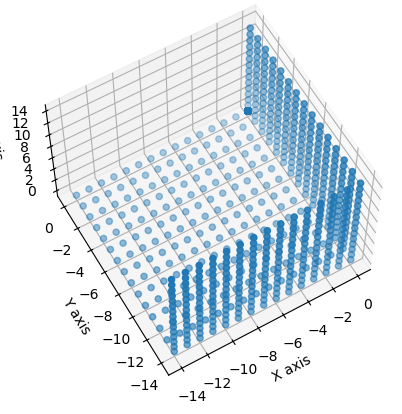

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = np.load("./data/data.npy")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Scatter plot
ax.scatter(data[0, :], data[1, :], data[2, :])

# Match the camera angle from your reference screenshot
ax.view_init(elev=60, azim=-120)  # Adjust azim value as needed

plt.show()


### **<span style="color:green"><b><i>ASSIGNMENT 7: Homogeneous transformations for the win</i></b></span>**

Now, create a new method called `apply_homogeneous_transformation()` that builds a homogeneous matrix from some *yaw*, *pitch* and *roll* values as well as a translation vector and applies it to the input data matrix `data`. *Note that we are not transforming vectors, but points. For plotting 3D points use [`scatter()`](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) instead of quiver.*

In [ ]:
# Assignment 7
def apply_homogeneous_transformation(data, yaw, pitch, roll, translation):
    """ Apply a linear transformation to a set of 3D-vectors and plot them
        
        Args:
            data: Input set of points to transform
            yaw: Degrees to rotate the coordinate system around the 'Z' axis 
            pitch: Degrees to rotate the coordinate system around the 'Y' axis 
            roll: Degrees to rotate the coordinate system around the 'X' axis 
            translation: Column vector containing the translation for each axis
    """  
    
    # Transform to radians
    
    
    # Construct rotation matrices
    
    
    # Combine rotation matrices
    
    
    # Create homogenous transformation matrix
    
    
    # Create figure
    

    # Prepare figure for 3D data
    

    # Name axes
    

    # Plot points
    

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, radians

def apply_homogeneous_transformation(data, yaw, pitch, roll, translation):
    """ Apply a homogeneous transformation to 3D points and plot only transformed points """

    # Convert to radians
    yaw, pitch, roll = map(radians, [yaw, pitch, roll])
    
    # Rotation matrices
    R_yaw = np.array([[cos(yaw), -sin(yaw), 0],
                      [sin(yaw),  cos(yaw), 0],
                      [0,         0,        1]])
    R_pitch = np.array([[ cos(pitch), 0, sin(pitch)],
                        [ 0,          1, 0        ],
                        [-sin(pitch), 0, cos(pitch)]])
    R_roll = np.array([[1, 0,          0        ],
                       [0, cos(roll), -sin(roll)],
                       [0, sin(roll),  cos(roll)]])
    
    # Combine rotation
    R = R_yaw @ R_pitch @ R_roll
    
    # Homogeneous transform
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = translation

    # Apply transformation (data already 4×N)
    transformed_data = T @ data
    transformed_data = transformed_data[:3, :]  # strip homogeneous row

    # Plot only transformed points
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title('Transformed 3D Data')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.scatter(transformed_data[0, :], transformed_data[1, :], transformed_data[2, :], c='b')

    plt.show()


Now apply the following transformation to the object previously loaded:

- Yaw rotation: 45 degrees
- Pitch rotation: -60 degrees
- Roll rotation: 20 degrees
- Translation:
    - X-axis: 20 units 
    - Y-axis: 20 units
    - Z-axis: 40 units

Remember that this have to be done using a homogenous transformation (one unique matrix multiplication).

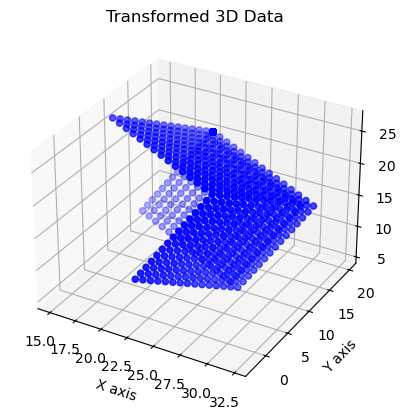

In [54]:
# Load data
data = np.load("./data/data.npy")
# print(data.shape)
# Apply transformation
apply_homogeneous_transformation(data, yaw=45, pitch=-60, roll=20, translation=np.array([20, 20, 20]))

<font color='blue'>**Expected output:**  </font>

<img src="./images/example_transformation_3b.png" width="500" align="left"/>
<img src="./images/blank.png" width="100" align="rigth"/>

By doing these transformations, our graphic engine could represent moving objects in the `WORLD` when the player is still (e.g. flying birds, cars, other players, etc.). 

### **<span style="color:green"><b><i>ASSIGNMENT 8: How the player sees the world</i></b></span>**

One final example, consider the following image, in where our character Joel is looking at a dystopian, post-apocalyptic scenario. 

<img src="./images/tlou.png" width="1200" align="center"/>

The `WORLD` reference system is displayed in orange and labeled with {$\mathbf{W}$} while the reference system of the character's view is displayed in red and labeled as {$\mathbf{C}$}. We know that the position and orientation of {$\mathbf{C}$} w.r.t. {$\mathbf{W}$} is given by a *yaw* angle of -45º, a *roll* angle of -90 and a translation of \[0.0,-4.0,1.2\] meters in \[$x$,$y$,$z$\] axes, respectively. Knowing that the coordinates of $p$ in the world are \[30.0,1.2,0.5\] meters, could you compute what are its coordinates w.r.t our character's point of view? As we will see in future notebooks, knowing such coordinates is vital to get the position of $p$ in the image that Joel would see if this game were in first-person (fortunately it's not!).

In [ ]:
# Assignment 8
# Write your code here!

# Transform to radians


# Construct rotation matrices


# Combine rotation matrices


# Create homogenous transformation matrix


In [81]:
import numpy as np
from numpy import sin, cos, radians

# World point (homogeneous)
p_W = np.array([[30.0], [12.0], [0.5], [1.0]])

# Angles
yaw = radians(-45)    # Z
pitch = radians(0)    # Y
roll = radians(-90)   # X

# Translation of {C} wrt {W}
t = np.array([0.0, -4.0, 1.2])

# Rotation matrices
Rz = np.array([[cos(yaw), -sin(yaw), 0], 
               [sin(yaw),  cos(yaw), 0],
               [0,         0,        1]]) # rotation about Z axis, yaw
Ry = np.array([[ cos(pitch), 0, sin(pitch)],
               [ 0,          1, 0        ],
               [-sin(pitch), 0, cos(pitch)]]) # rotation about Y axis, pitch
Rx = np.array([[1, 0,          0        ],
               [0, cos(roll), -sin(roll)],
               [0, sin(roll),  cos(roll)]]) # rotation about X axis, roll

# Let's there be no change in orientation, only translation
# R = np.eye(3) # Identity, no rotation

# When there is change in orientation (i.e., yaw = radians(-45), roll=radians(-90)), 
# ... we will consider ZYX (roll first in body, then pitch, then yaw)
R = Rz @ Ry @ Rx # Combined rotation matrix, from {C} to {W}, R = R_WC, so R_CW = R_WC^T

print('R =\n', R)   

# Homogeneous transform {C} wrt {W}
T_WC = np.eye(4)
T_WC[:3, :3] = R
T_WC[:3, 3] = t

# Invert to go from world to character
T_CW = np.linalg.inv(T_WC)

# Transform
p_C = T_CW @ p_W
print('p_C =\n', p_C)


R =
 [[ 7.07106781e-01  4.32978028e-17  7.07106781e-01]
 [-7.07106781e-01  4.32978028e-17  7.07106781e-01]
 [ 0.00000000e+00 -1.00000000e+00  6.12323400e-17]]
p_C =
 [[ 9.89949494]
 [ 0.7       ]
 [32.52691193]
 [ 1.        ]]


In [60]:
import numpy as np
from numpy import cos, sin, radians

def Rx(a): 
    a = radians(a); 
    return np.array([[1,0,0],
                     [0,cos(a),-sin(a)],
                     [0,sin(a),cos(a)]])
def Rz(a):
    a = radians(a); 
    return np.array([[cos(a),-sin(a),0],
                     [sin(a),cos(a),0],
                     [0,0,1]])

# given
pW = np.array([30.0, 12.0, 0.5])                 # world point (x,y,z)
R  = Rz(-45) @ Rx(-90)                           # yaw=-45°, roll=-90°
t_problem_text    = np.array([0.0, -4.0, 1.2])  

def world_to_char(pW, tWC):
    return np.append(R.T @ (pW - tWC), 1.0)      # homogeneous 4×1 for display

print("Using t_WC = [0, -4, 1.2]:")
print(world_to_char(pW, t_problem_text))         # -> [ 9.89949494  0.7        32.52691193  1.        ]


Using t_WC = [0, -4, 1.2]:
[ 9.89949494  0.7        32.52691193  1.        ]


<font color='blue'>**Expected output:**  </font> 
    
    p_C =
    [[ 9.89949494]
    [ 0.7       ]
    [32.52691193]
    [ 1.        ]]

## Conclusion

Awesome!

This was an introductory notebook covering some mathematical tools that are the building blocks for image formation. We made an excellent work trying to master this maths. We have learned:

- How to plot vectors and products between them.
- The ideas behind the linear transformation of vectors.
- How to rotate and translate points or vectors using Cartesian coordinates.
- The principles of homogeneous coordinates.
- How to rotate and translate points or vectors using homogeneous coordinates.